<a href="https://colab.research.google.com/github/reenaturak/Donor_Project_Match/blob/master/post_conversation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount google drive and import reqiured libs


In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
import warnings

#from pandas_profiling import ProfileReport

warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 5000

In [4]:
#!pip3 install pandas_profiling --upgrade

## Read CSV

In [5]:
# Evertrue
input_df = pd.read_csv("/content/drive/MyDrive/prospecting_model/EverTrue_data/2022-06-24 Post-Engagement Aggregate.csv")
activities_df = pd.read_csv("/content/drive/MyDrive/prospecting_model/EverTrue_data/2022-06-24 Post-Engagement Activities.csv")

# Alice
# input_df = pd.read_csv("/content/drive/MyDrive/prospecting_model/Alice_data/2022-06-27 ALICE Post-Engagement Aggregate.csv")
# activities_df = pd.read_csv("/content/drive/MyDrive/prospecting_model/Alice_data/2022-06-27 ALICE Post-Engagement Activities.csv")


In [6]:
activities_df.head()

,account_id,account_owner,account_create_date,account_is_successful,contact_id,pre_engagement_successful,post_engagement_successful,first_activity,first_connection,opp_create_date,final_prospecting_activity,prospecting_end_date,activity_id,sf_id,activity_date,activity_owner,icon,flesch_reading_ease,flesch_kincaid_grade,word_count,direction,tag_name,is_connection,pre_engagement,cycle_start,is_response,prev_contact_activity_date,prev_contact_rep_activity_date,time_since_last,big_activity_gap
0,652637,34792.0,2017-11-27 13:31:48+00,True,61550476,True,True,2021-04-30 19:23:34+00,2021-05-05 21:19:24+00,2021-05-06 15:28:23+00,2021-05-06 15:35:00+00,2021-05-06 15:37:50+00,46739311,00T1Q00005ncNqZUAU,2021-05-05 21:19:24+00,86089,mail,78.59,6.8,36.0,inbound,{interested},True,False,False,False,2021-05-05 20:44:21+00,2021-05-05 20:44:21+00,0.024340,False
1,652637,34792.0,2017-11-27 13:31:48+00,True,61550476,True,True,2021-04-30 19:23:34+00,2021-05-05 21:19:24+00,2021-05-06 15:28:23+00,2021-05-06 15:35:00+00,2021-05-06 15:37:50+00,46808897,00T1Q00005ncnDhUAI,2021-05-06 14:46:32+00,86089,mail,78.59,6.8,54.0,outbound,{followup},False,False,False,True,2021-05-05 21:19:24+00,2021-05-05 21:19:24+00,0.727176,False
2,652637,34792.0,2017-11-27 13:31:48+00,True,61550476,True,True,2021-04-30 19:23:34+00,2021-05-05 21:19:24+00,2021-05-06 15:28:23+00,2021-05-06 15:35:00+00,2021-05-06 15:37:50+00,46813131,00T1Q00005ncoLtUAI,2021-05-06 15:24:33+00,86089,mail,82.75,5.2,97.0,outbound,"{followup,templated_email}",False,False,False,False,2021-05-06 14:46:32+00,2021-05-06 14:46:32+00,0.026400,False
3,652637,34792.0,2017-11-27 13:31:48+00,True,61550476,True,True,2021-04-30 19:23:34+00,2021-05-05 21:19:24+00,2021-05-06 15:28:23+00,2021-05-06 15:35:00+00,2021-05-06 15:37:50+00,46811761,00T1Q00005ncphwUAA,2021-05-06 15:32:57+00,1079381,mail,94.15,2.9,11.0,inbound,{interested},True,False,False,False,2021-05-06 15:24:33+00,NaN,NaN,NaN
4,652637,34792.0,2017-11-27 13:31:48+00,True,61550476,True,True,2021-04-30 19:23:34+00,2021-05-05 21:19:24+00,2021-05-06 15:28:23+00,2021-05-06 15:35:00+00,2021-05-06 15:37:50+00,46813133,00T1Q00005ncpY3UAI,2021-05-06 15:33:36+00,86089,mail,62.34,6.8,9.0,inbound,NaN,True,False,False,False,2021-05-06 15:32:57+00,2021-05-06 15:24:33+00,0.006285,False


In [7]:
input_df.shape

(624, 37)

In [8]:
input_df.tail()

,account_id,account_is_successful,contact_id,pre_engagement_successful,post_engagement_successful,first_connection,prospecting_end_date,time_in_post_conversation,avg_word_count,avg_flesch_kincaid_grade,avg_flesch_reading_ease,contact_count,connected_contact_count,activity_count,connection_count,meeting_count,email_count,inbound_count,outbound_count,templated_email_count,call_count,connected_call_count,linkedin_count,sms_count,activity_type_count,rep_count,big_gap_count,avg_big_gap,activity_velocity,email_velocity,inbound_velocity,outbound_velocity,call_velocity,calendar_velocity,connection_velocity,avg_followup,avg_ttr
619,88185836,False,140632349,True,False,2022-06-23 12:21:52+00,2022-06-24 16:26:07.734833+00,1.169627,19.000000,4.600000,73.540001,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,NaN,0.854974,0.854974,0.854974,0.000000,0.000000,0.000000,0.854974,NaN,NaN
620,88186436,True,140633159,True,True,2022-06-22 03:08:16+00,2022-06-22 21:42:56+00,0.774074,36.250000,3.075000,88.074999,1,1,4,2,0,4,2,2,0,0,0,0,0,1,1,0,NaN,5.167464,4.000000,2.000000,2.000000,0.000000,0.000000,2.000000,NaN,0.296088
621,88186446,True,140633170,True,True,2022-06-21 19:24:06+00,2022-06-22 21:39:21+00,1.093924,104.000000,5.139573,81.730003,1,1,2,1,0,1,0,1,0,1,1,0,0,2,2,0,NaN,1.828281,0.914141,0.000000,0.914141,0.914141,0.000000,0.914141,NaN,NaN
622,88214845,False,140648723,True,False,2022-06-12 18:56:27+00,2022-06-24 16:26:07.734833+00,11.895610,56.428571,2.399158,94.648572,1,1,9,5,2,7,3,4,0,0,0,0,0,2,2,0,NaN,0.756582,0.588452,0.252194,0.336258,0.000000,0.168129,0.420323,0.008079,0.387477
623,88216568,True,140651165,True,True,2022-06-23 18:45:00+00,2022-06-23 20:27:51+00,0.071424,NaN,NaN,NaN,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,NaN,14.000972,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN


In [9]:
input_df['contact_id'].nunique()

624

In [10]:
input_df['post_engagement_successful'].value_counts()

True     416
False    208
Name: post_engagement_successful, dtype: int64

In [11]:
additional_metrics =  pd.DataFrame(columns=['metrics_name','sub_classification','partition_type','partition_value','total_count','successful_count','unsuccessful_count'])

## Number of Contacts

In [ ]:
# Get account level success 
# Account is successful if any of the contact is post_engagement_successful

input_df['post_conversation_account_success'] = input_df.groupby('account_id')['post_engagement_successful'].transform('any')

In [ ]:
total_accounts = input_df['account_id'].nunique()

In [ ]:
# Get count of unique contact_id group by account
input_contacts_metrics = input_df.groupby(['account_id', 'post_conversation_account_success'])['contact_id'].nunique()

input_contacts_metrics_df = input_contacts_metrics.to_frame()
input_contacts_metrics_df.reset_index(inplace=True)

In [ ]:
# Compute single contact and add to additional_metrics

single_contact_df = input_contacts_metrics_df[input_contacts_metrics_df['contact_id']==1]
single_contact_count = single_contact_df.shape
single_contact_class_count = single_contact_df['post_conversation_account_success'].value_counts()

additional_metrics.append({'metrics_name' : 'number_of_contacts', 'sub_classification' : 'single_contact', 
                           'partition_type' : 'account', 'partition_value' : 'post_conversation',
                           'total_count': single_contact_count[0],'successful_count':single_contact_class_count[1] ,
                           'unsuccessful_count': single_contact_class_count[0]}, ignore_index = True)

,metrics_name,sub_classification,partition_type,partition_value,total_count,successful_count,unsuccessful_count
0,number_of_contacts,single_contact,account,post_conversation,575,392,183


In [ ]:
single_contact_df['post_conversation_account_success'].value_counts()

True     392
False    183
Name: post_conversation_account_success, dtype: int64

In [ ]:
# Compute more than one contact and add to additional_metrics

additional_metrics
more_than_one_contact_df = input_contacts_metrics_df[input_contacts_metrics_df['contact_id']>1]
more_than_one_contact_count = more_than_one_contact_df.shape
more_than_one_contact_class_count = more_than_one_contact_df['post_conversation_account_success'].value_counts()

additional_metrics.append({'metrics_name' : 'number_of_contacts', 'sub_classification' : 'more_than_one_contact', 
                           'partition_type' : 'account', 'partition_value' : 'post_conversation',
                           'total_count': more_than_one_contact_count[0],'successful_count':more_than_one_contact_class_count[1] ,
                           'unsuccessful_count': more_than_one_contact_class_count[0]}, ignore_index = True)

,metrics_name,sub_classification,partition_type,partition_value,total_count,successful_count,unsuccessful_count
0,number_of_contacts,more_than_one_contact,account,post_conversation,22,11,11


In [ ]:
# Verification

#input_df[input_df['account_id']==87986917]
#df12[df12['account_id']==87986917]

## Single/Multi channel

In [30]:
# Get counts for single and multi channel at contact level

df11 = input_df[ (input_df['outbound_count']>0) &
          (input_df['meeting_count']==0) &
          (input_df['connected_call_count']==0) &
          (input_df['linkedin_count']==0) 
         ]

def get_single_channel_count(df):
  additional_metrics =  pd.DataFrame(columns=['metrics_name','sub_classification','partition_type','partition_value','total_count','successful_count','unsuccessful_count'])
  outbound_only = input_df[ (input_df['outbound_count']>0) &
                            (input_df['meeting_count']==0) &
                            (input_df['connected_call_count']==0) &
                            (input_df['linkedin_count']==0) &
                            (input_df['sms_count']==0)  
                          ]
  
  meeting_only = input_df[ (input_df['outbound_count']==0) &
                            (input_df['meeting_count']>0) &
                            (input_df['connected_call_count']==0) &
                            (input_df['linkedin_count']==0) &
                            (input_df['sms_count']==0) 
                          ]
  
  calls_only = input_df[ (input_df['outbound_count']==0) &
                         (input_df['meeting_count']==0) &
                         (input_df['connected_call_count']>0) &
                         (input_df['linkedin_count']==0) &
                         (input_df['sms_count']==0)
                          ]
  metrics = {"outbound_only": outbound_only, "meeting_only": meeting_only, "calls_only": calls_only}

  for metrics_name, metric in metrics.items():
    contact_count = metric.shape
    class_count = metric['post_engagement_successful'].value_counts()

    additional_metrics = additional_metrics.append({'metrics_name' : 'single/multi channel', 
                                                       'sub_classification' : metrics_name, 
                                                       'partition_type' : 'contact', 
                                                       'partition_value' : 'post_conversation',
                                                       'total_count': contact_count[0],
                                                       'successful_count': class_count[1] ,
                                                       'unsuccessful_count': class_count[0]}, 
                                                      ignore_index = True)
  
  return additional_metrics

In [31]:
# Get single channel metrics

additional_metrics1 = get_single_channel_count(input_df)
additional_metrics1

,metrics_name,sub_classification,partition_type,partition_value,total_count,successful_count,unsuccessful_count
0,single/multi channel,outbound_only,contact,post_conversation,161,102,59
1,single/multi channel,meeting_only,contact,post_conversation,118,102,16
2,single/multi channel,calls_only,contact,post_conversation,32,17,15


## Thresholds at contact-level

In [ ]:
#input_metrics_contact = input_df[['contact_id', 'activity_count','avg_word_count',	'avg_flesch_kincaid_grade', 'avg_big_gap' ]]

In [ ]:
# Aggregate at contact level

# input_metrics_contact = input_df.groupby('contact_id').agg({'activity_count':[('avg_activity_count','mean')],
#                                                             'big_gap_count':[('avg_big_gap_count','mean')],
#                                                             'avg_big_gap':[('avg_big_gap','mean')],
#                                                             'avg_word_count':[('avg_word_count','mean')],
#                                                             'avg_flesch_kincaid_grade':[('avg_flesch_kincaid_grade','mean')],
#                                                             })

input_metrics_contact = input_df.groupby('contact_id').agg({'avg_followup':[('avg_rep_followup_time','mean')],
                                                            'avg_ttr':[('avg_rep_response_time','mean')]})


In [ ]:
# Drop multi-index for columns and reset index
input_metrics_contact.columns = input_metrics_contact.columns.droplevel()
input_metrics_contact.reset_index(inplace=True)

# input_metrics_contact['avg_big_gap'].fillna(0, inplace=True)
# input_metrics_contact.head()

In [ ]:
input_metrics_contact.isnull().sum()
#avg_activity_count.shape

contact_id                0
avg_rep_followup_time    77
avg_rep_response_time    96
dtype: int64

In [ ]:
input_metrics_contact.dropna(inplace=True)
input_metrics_contact.shape

(170, 3)

In [ ]:
input_metrics = pd.merge(input_df[['contact_id','post_engagement_successful']], input_metrics_contact, how='inner', on='contact_id')
input_metrics['stage_name'] = 'post_engagement'
input_metrics.rename(columns={"contact_id": "opportunity_id", "post_engagement_successful": "is_won"}, inplace=True)
input_metrics.to_csv("/content/drive/MyDrive/prospecting_model/Alice_post_06272022_org_13.csv", index=False)

input_metrics['is_won'].value_counts()

True     100
False     70
Name: is_won, dtype: int64

In [ ]:
input_metrics['opportunity_id'].nunique()

174

## Cycle Length/Gap

In [ ]:
input_metrics_cycle_len = input_df.groupby(['contact_id', 'post_engagement_successful']).agg({'cycle_length':[('cycle_length_avg','mean')],
                                                         'cycle_gap':[('cycle_gap_avg','mean')]})


In [ ]:
# Drop multi-index for columns and reset index

input_metrics_cycle_len.columns = input_metrics_cycle_len.columns.droplevel()
input_metrics_cycle_len.reset_index(inplace=True)
input_metrics_cycle_len.head()

,contact_id,post_engagement_successful,cycle_length_avg,cycle_gap_avg
0,2464,False,16.929699,622.289676
1,3679,False,26.235822,NaN
2,3977,False,25.656273,658.732373
3,3994,True,0.083125,NaN
4,4094,False,25.183938,222.776875


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efae7e98310>]],
      dtype=object)

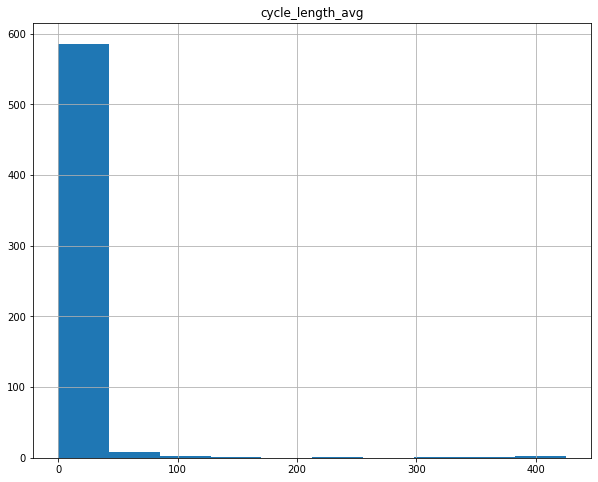

In [ ]:
input_metrics_cycle_len.hist(column=["cycle_length_avg"],  figsize=(10, 8))

In [ ]:
df1 = input_metrics_cycle_len[input_metrics_cycle_len['cycle_length_avg']<=5]
df1['post_engagement_successful'].value_counts()

True     220
False     14
Name: post_engagement_successful, dtype: int64

In [ ]:
df91 = input_df[ (input_df['outbound_count']>0) &
            (input_df['meeting_count']>0) 
             #(input_df['connected_call_count']>0) 
            #  (input_df['linkedin_count']==0)
             ]

df91['post_engagement_successful'].value_counts()

True     124
False     76
Name: post_engagement_successful, dtype: int64

In [ ]:
# Groub by contact and post_engagement_successful to get prospecting cycle count and sum of activity count

df1 = input_df.groupby(['contact_id', 'post_engagement_successful'])\
                          .agg({'cycle_num':[('prospecting_cycle_count','max')],
                                'activity_count':[('avg_activity_count','sum')]})

df1.columns = df1.columns.droplevel()
df1.reset_index(inplace=True)

print("df1 shape: ", df1.shape)
print("Unique contacts in df1: ", df1['contact_id'].nunique())

df1.head()

In [ ]:
# Contacts having 1 prospecting cycle
df2 = df1[df1['prospecting_cycle_count']>0]

print("df2 shape: ", df2.shape)
print("Unique contacts in df2: ", df2['contact_id'].nunique())

df2['post_engagement_successful'].value_counts()

df2 shape:  (390, 4)
Unique contacts in df2:  390


True     298
False     92
Name: post_engagement_successful, dtype: int64

In [ ]:
# prospecting cycle =1 and any number of activities

df81 = pd.merge(input_df[['account_id', 'contact_id', 'inbound_count', 'outbound_count', 'call_count', 'connected_call_count' ,
                         'meeting_count', 'linkedin_count', 'sms_count']], 
               df2, on='contact_id' , how='inner')

df91 = df81[ 
            (df81['connected_call_count']>0) &
             (df81['outbound_count']>0) &
             (df81['linkedin_count']==0) &
              (df81['meeting_count']==0) &
             (df81['sms_count']==0)]

#  & (df81['call_count']==0) & 
#             (df81['outbound_count']==0) & (df81['linkedin_count']==0) & (df81['sms_count']==0)

df91['post_engagement_successful'].value_counts()

True     22
False     4
Name: post_engagement_successful, dtype: int64

In [ ]:
# Prospecting cycle having 1 cycle and 1 activity count
df3 = df1[(df1['prospecting_cycle_count']==1) & (df1['avg_activity_count']==1)]

print("df3 shape: ", df3.shape)
print("Unique contacts in df3: ", df3['contact_id'].nunique())

df3['post_engagement_successful'].value_counts()

df3 shape:  (135, 4)
Unique contacts in df3:  135


True     100
False     35
Name: post_engagement_successful, dtype: int64

In [ ]:
# Prospecting cycle having 1 cycle and 2 activity count
df4 = df1[(df1['prospecting_cycle_count']==1) & (df1['avg_activity_count']==2)]

print("df4 shape: ", df4.shape)
print("Unique contacts in df4: ", df4['contact_id'].nunique())

df4['post_engagement_successful'].value_counts()

df4 shape:  (84, 4)
Unique contacts in df4:  84


True     61
False    23
Name: post_engagement_successful, dtype: int64

In [ ]:
# Prospecting cycle having 1 cycle and 2 or more activity count
df5 = df1[(df1['prospecting_cycle_count']==1) & (df1['avg_activity_count']>=2)]

print("df5 shape: ", df5.shape)
print("Unique contacts in df5: ", df5['contact_id'].nunique())

df5['post_engagement_successful'].value_counts()

df5 shape:  (255, 4)
Unique contacts in df5:  255


True     198
False     57
Name: post_engagement_successful, dtype: int64

In [ ]:
# Prospecting cycle having 1 cycle and more than 2 activity count
df6 = df1[(df1['prospecting_cycle_count']==1) & (df1['avg_activity_count']>2)]

print("df6 shape: ", df6.shape)
print("Unique contacts in df6: ", df6['contact_id'].nunique())

df6['post_engagement_successful'].value_counts()

df6 shape:  (171, 4)
Unique contacts in df6:  171


True     137
False     34
Name: post_engagement_successful, dtype: int64

In [ ]:
# when activity count =1 what type of activity 
df7 = pd.merge(input_df[['account_id', 'contact_id', 'inbound_count', 'outbound_count', 'call_count', 
                         'meeting_count', 'linkedin_count', 'sms_count']], 
               df3, on='contact_id' , how='inner')

df77 = pd.merge(activities_df[['account_id', 'contact_id', 'activity_id']], 
               df7, on='contact_id' , how='inner')


print("df7 shape: ", df7.shape)
# print("Unique contacts in df7: ", df7['contact_id'].nunique())
# print(" \n Inbound counts: \n",  df7['inbound_count'].value_counts())
# print(" \n Outbound counts: \n", df7['outbound_count'].value_counts())
# print(" \n Meeting counts: \n", df7['meeting_count'].value_counts())
# print(" \n Calls counts: \n", df7['call_count'].value_counts())
# print(" \n Linkedin counts: \n", df7['linkedin_count'].value_counts())
# print(" \n Sms counts: \n", df7['sms_count'].value_counts())

#df77[(df77['meeting_count']>0) & (df77['call_count']==0) & (df77['outbound_count']==0) & (df77['inbound_count']==0)]

In [ ]:
f2 = df7[df7['inbound_count']>0]
f2.shape
f2['post_engagement_successful'].value_counts()
f2

In [ ]:
# when activity count =2 what type of activity type combinations work
df8 = pd.merge(input_df[['account_id', 'contact_id', 'inbound_count', 'outbound_count', 'call_count', 'meeting_count']], 
               df4, on='contact_id' , how='inner')


print("df8 shape: ", df8.shape)
print("Unique contacts in df8: ", df8['contact_id'].nunique())

print(" \n Inbound counts: \n",  df8['inbound_count'].value_counts())
print(" \n Outbound counts: \n", df8['outbound_count'].value_counts())
print(" \n Meeting counts: \n", df8['meeting_count'].value_counts())
print(" \n Calls counts: \n", df8['call_count'].value_counts())

df8 shape:  (84, 9)
Unique contacts in df8:  84
 
 Inbound counts: 
 1    47
0    35
2     2
Name: inbound_count, dtype: int64
 
 Outbound counts: 
 1    61
0    20
2     3
Name: outbound_count, dtype: int64
 
 Meeting counts: 
 0    56
1    19
2     9
Name: meeting_count, dtype: int64
 
 Calls counts: 
 0    71
1    13
Name: call_count, dtype: int64


In [ ]:
f1 = df8[(df8['meeting_count']>0) &(df8['inbound_count']>0) ]
f1.shape
f1['post_engagement_successful'].value_counts()

True    6
Name: post_engagement_successful, dtype: int64

In [ ]:
# Contacts having 2 prospecting cycle
df9 = df1[df1['prospecting_cycle_count']>=2]

print("df9 shape: ", df9.shape)
print("Unique contacts in df9: ", df9['contact_id'].nunique())

df9['post_engagement_successful'].value_counts()

df9 shape:  (213, 4)
Unique contacts in df9:  213


False    115
True      98
Name: post_engagement_successful, dtype: int64